In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [3]:
params = parse_experiment_params("../experiments_params/case_1.json")
results = get_experiment_mean_data(params, "../results/case_0/")

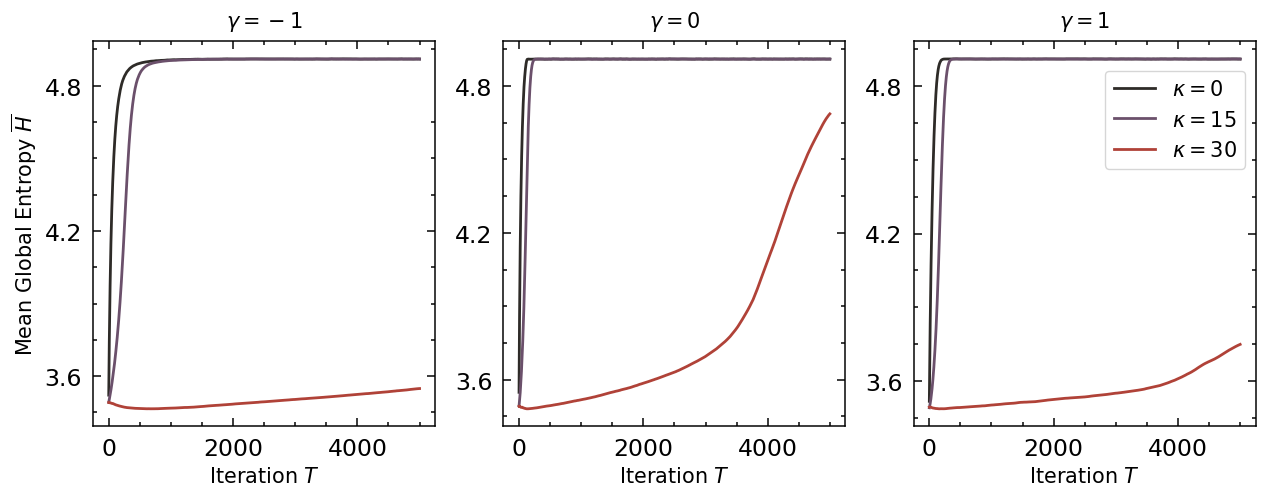

In [31]:
# parameters 

nrows = 1
ncols = 3

titles = [rf"$\gamma = {k}$" for k in [-1, 0, 1]]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

measure = 'entropy'

kappa_color = {
    0: "#2e2b28",
    15: "#6b506b",
    30: "#b04238"
}

X = np.arange(1, 5000 + 1)

selected_params = [x for x in params if x['gamma'] == -1]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width)
    
selected_params = [x for x in params if x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width)
    
selected_params = [x for x in params if x['gamma'] == 1]
for p in selected_params:
    axs[2].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width, label = rf"$\kappa = {p['kappa']}$")
axs[2].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor = (1, 0.95))

In [10]:
from opdynamics.utils.plotting.plotting import heat_plot

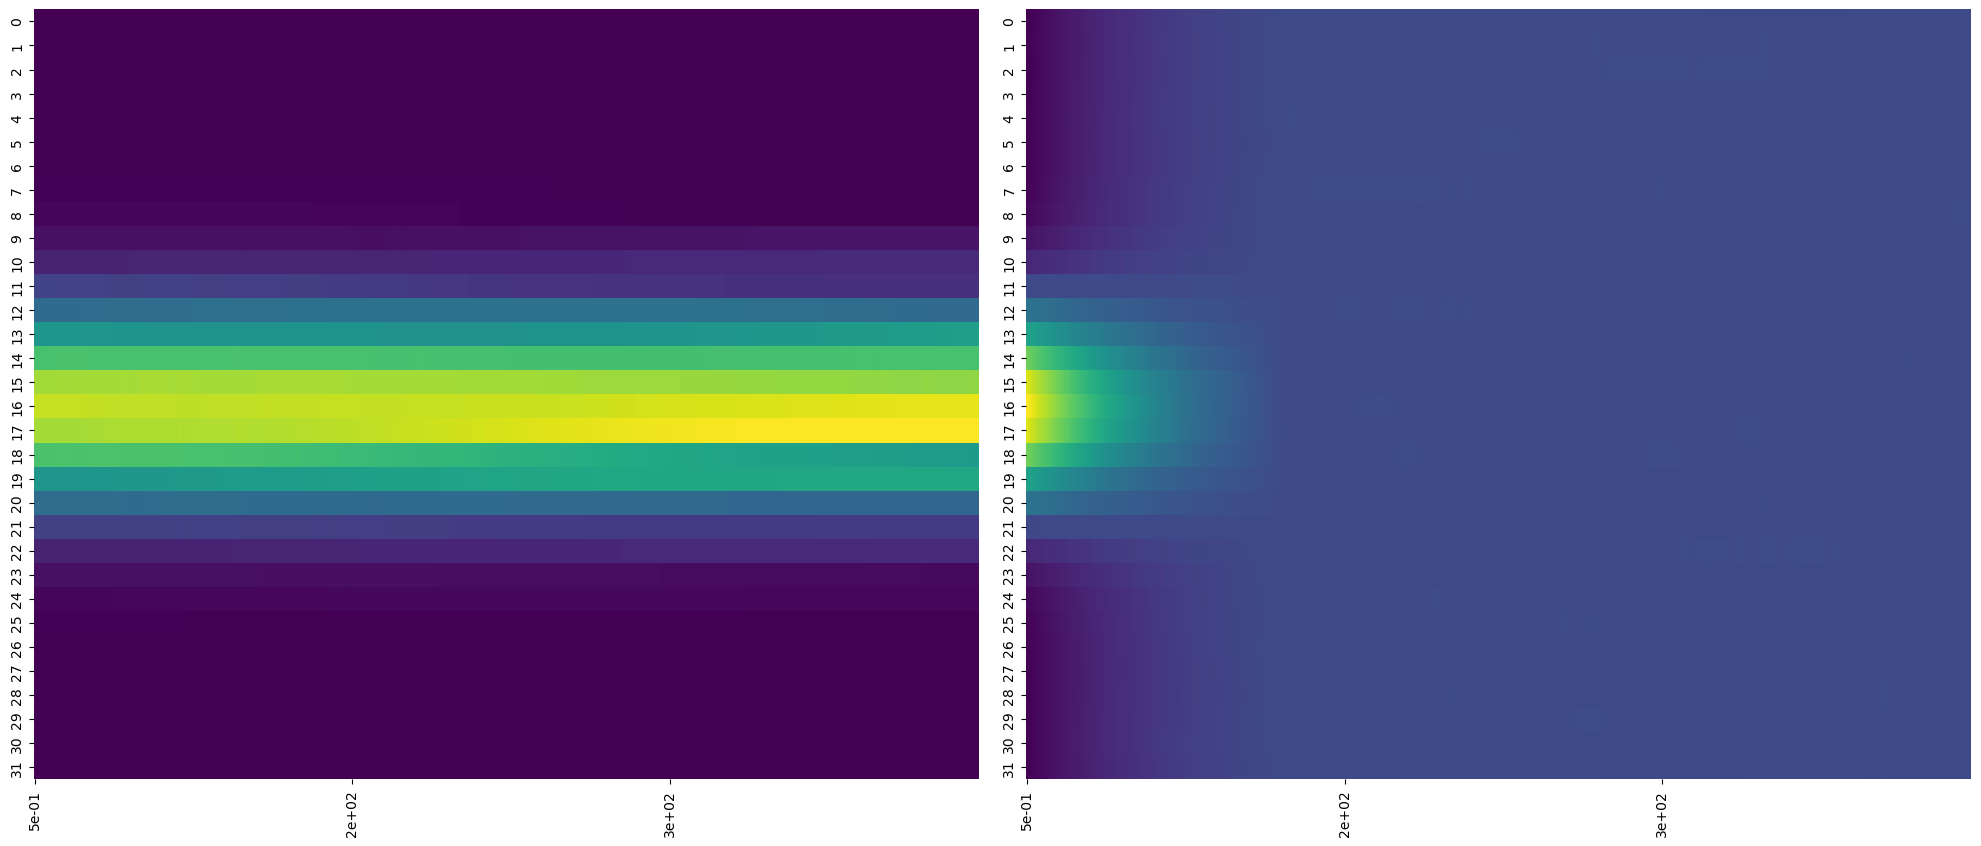

In [27]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 10))
fig.subplots_adjust(wspace = 0.05)

param = [x for x in params if x['kappa'] == 30 and x['gamma'] == 1].pop()
data = results[make_tuple(param)]
_, ax = heat_plot(data['distribution'], cmap = 'viridis', fig = fig, ax = axs[0])

param = [x for x in params if x['kappa'] == 0 and x['gamma'] == 0].pop()
data = results[make_tuple(param)]
_, ax = heat_plot(data['distribution'], cmap = 'viridis', fig = fig, ax = axs[1])


Text(0.5, 1.0, 'Evolução Temporal das Probabilidades das Informações ($T = 200$ até $T = 2000$); $\\kappa = \\gamma = 0$')

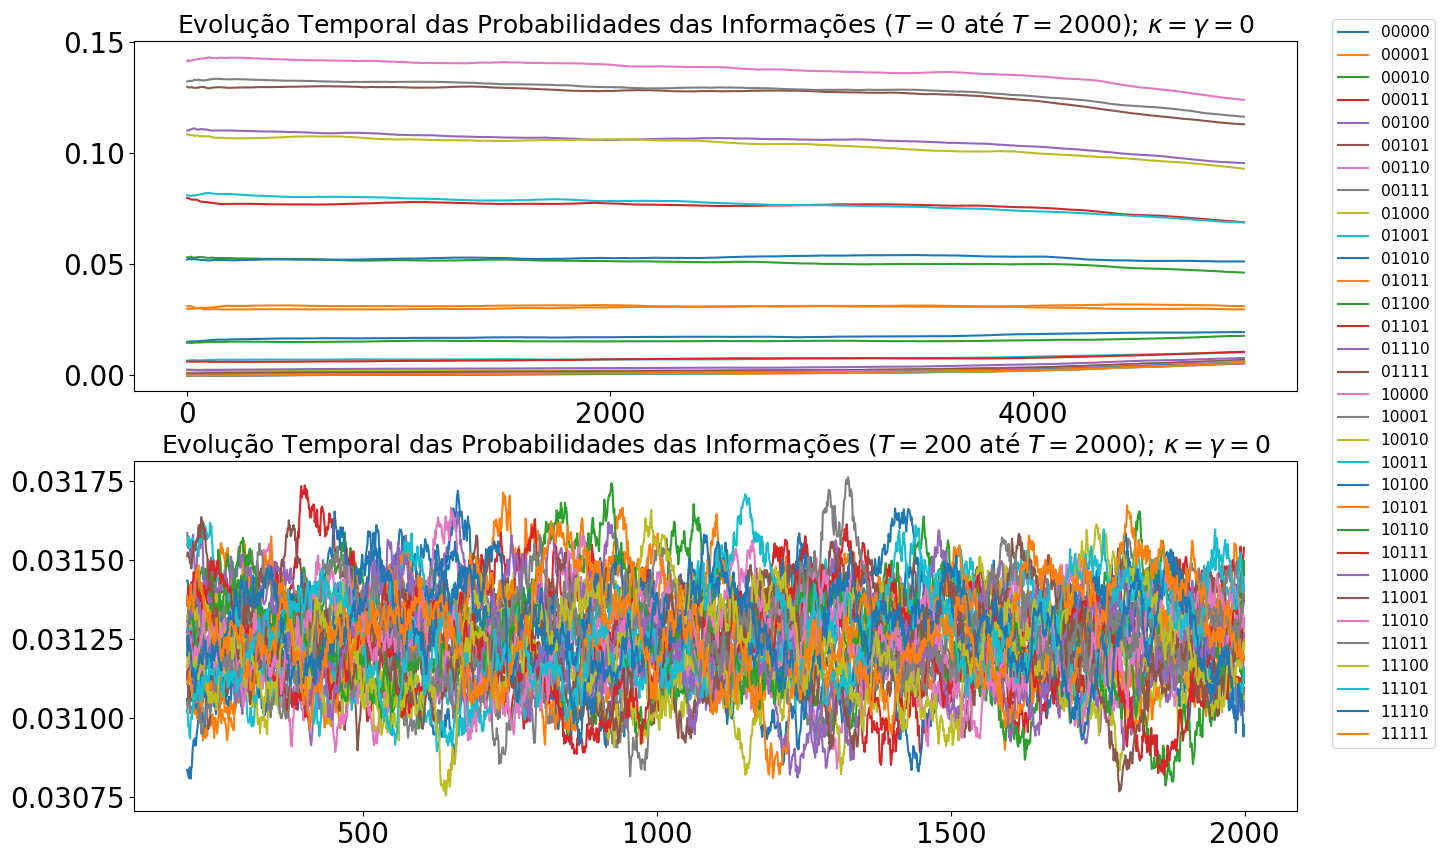

In [23]:
fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (15, 10))
for ax in axs:
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)

getbinary = lambda x, n: format(x, 'b').zfill(n)

param = [x for x in params if x['kappa'] == 30 and x['gamma'] == 1].pop()
data = results[make_tuple(param)]['distribution']
X = np.arange(data.shape[1])

for k in range(len(data)):
    axs[0].plot(X[:5000], data[k][:5000], label = f"{getbinary(k, 5)}")
    
axs[0].legend(fontsize = 11, loc = (1.03, -1.02))
axs[0].set_title(rf"Evolução Temporal das Probabilidades das Informações ($T = 0$ até $T = 2000$); $\kappa = \gamma = 0$", fontsize = 18)
    
param = [x for x in params if x['kappa'] == 0 and x['gamma'] == 0].pop()
data = results[make_tuple(param)]['distribution']
X = np.arange(data.shape[1])[200:2000]

for k in range(len(data)):
    axs[1].plot(X, data[k][200:2000], label = f"{k}")
    
axs[1].set_title(rf"Evolução Temporal das Probabilidades das Informações ($T = 200$ até $T = 2000$); $\kappa = \gamma = 0$", fontsize = 18)

# fig.savefig("curvas_evolucao_dist_probabilidade.png", bbox_inches='tight')